# Matplotlib Overview Lecture

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [1]:
import matplotlib.pyplot as plt

In [5]:
'''
If you are using Jupyter notebook you need to write the line of code below. 
It's going to allow you to actually see the plots you create inside the Jupyter notebook
'''
%matplotlib inline 
'''
if you are not using jupyter notebook,
then at the end of all your commands for plotting you will write plt.show()
'''

# Basic Example

Let's walk through a very simple example using two numpy arrays:

In [4]:
import numpy as np
x = np.linspace(0,5,11)
y = x**2

In [9]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [10]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

In [11]:
'''
Two ways of creating a matplotlib plot. 
Functional method and Object Oriented Method. 
Object Oriented method is the better one.
'''

In [6]:
#First we will look into the functional method

## Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

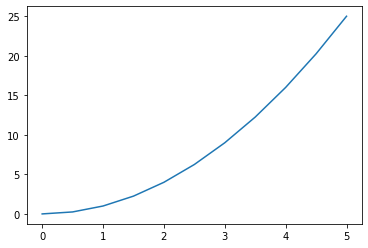

In [7]:
#FUNCTIONAL
plt.plot(x,y)
#if you are in some other IDE, then must type plt.show()

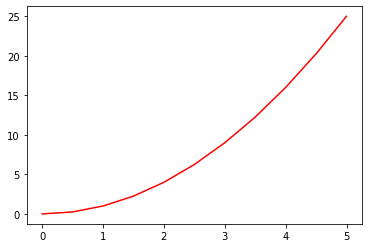

In [8]:
#You can add color and line styles like MATLAB 
plt.plot(x,y,'r-') #We will talk more about these later on

Text(0.5, 1.0, 'Title')

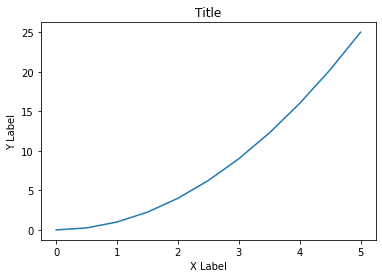

In [9]:
#xlabel, ylabel and plot title
plt.plot(x,y)
plt.xlabel('X Label')
plt.ylabel('Y Label')
plt.title('Title')     

## Creating Multiplots on Same Canvas

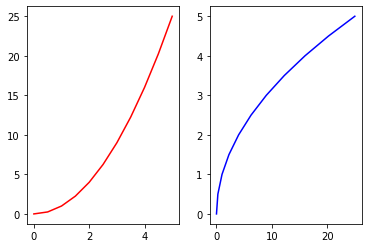

In [10]:
#Creating multiplots on the same canvas
plt.subplot(1,2,1)
plt.plot(x,y,'r')

plt.subplot(1,2,2)
plt.plot(y,x,'b')

# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

In [11]:
# Now we'll jump into matplotlib's object oriented api method

Text(0.5, 1.0, 'Title')

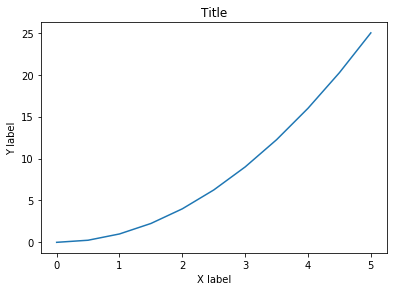

In [12]:
# Object Oriented method
fig = plt.figure()
'''
We have created a figure object. Assume this fig as a blank canvas
add_axes takes four arguments left,bottom, width and height that range from 0 to 1. 
Basically the percent of the blank canvas you want to go ahead and take
'''
axes = fig.add_axes([0.1,0.1,0.8,0.8]) 

axes.plot(x,y)
axes.set_xlabel('X label')
axes.set_ylabel('Y label')
axes.set_title('Title')

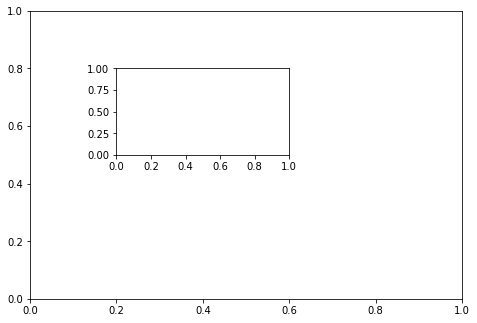

In [13]:
fig = plt.figure()
'''
four parameters of add_axes (left, bottom, height, width). 
all parameters means percentage of the canvas.
'''
axes1 = fig.add_axes([0,0,1,1])  #Range of add_axes 0 to 1
axes2 = fig.add_axes([0.2,0.5,0.4,0.3])

Text(0.5, 1.0, 'Smaller Plot')

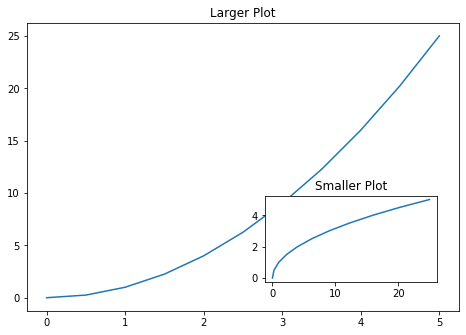

In [14]:
#moving the inner axes2 to bottom right corner
fig = plt.figure()
axes1 = fig.add_axes([0,0,1,1])         
axes2 = fig.add_axes([0.55,0.1,0.4,0.3])
axes1.plot(x,y)
axes2.plot(y,x)
axes1.set_title('Larger Plot')
axes2.set_title('Smaller Plot')

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

Basic use cases:

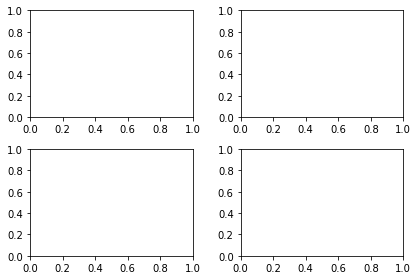

In [46]:
#Subplots using OOP method
fig,axes = plt.subplots(nrows=2,ncols=2)
#We see overlaps. To fix those write the code below:
plt.tight_layout()

#axes.plot(x,y)

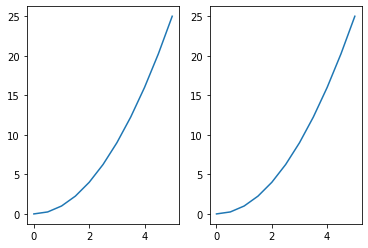

In [49]:
fig,axes = plt.subplots(nrows=1,ncols=2)

for current_ax in axes:
    current_ax.plot(x,y)

In [15]:
'''
From type we see axes object is just array/list of axes. 
So we can iterate through it
'''
axes 

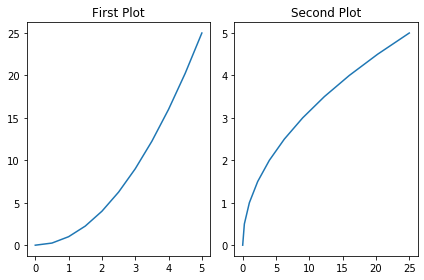

In [17]:
fig,axes = plt.subplots(nrows=1,ncols=2)

#As axes is list of axes. Thus we can access it using indexes
axes[0].plot(x,y)
axes[0].set_title('First Plot')

axes[1].plot(y,x)
axes[1].set_title('Second Plot')

#To remove overlapping its always a good practice to type plt.tight_layout() at the end
plt.tight_layout()

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

In [57]:
#We've seen two ways of subplotting. The first one is a bit more manual.
#FIRST METHOD
#fig = plt.figure()
#axes = fig.add_axes([0.1,0.1,0.8,0.8])
#axes1.plot(x,y)

#SECOND METHOD
#fig,axes = plt.subplots(nrows=1,ncols=2)
#axes[0].plot(x,y)

### Figure Size and DPI
Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

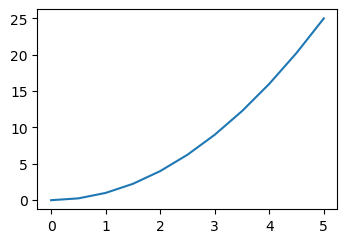

In [66]:
'''
Plot size in inches manually. Pass a tuple into figsize -> (width,height). 
Here, figsize(3 inches wide,2 inches height. Default DPI usage is common
'''
fig = plt.figure(figsize=(3,2),dpi=100) 

ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)

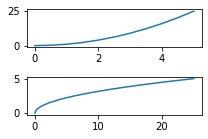

In [18]:
#Second Suplotting Method
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=(3,2)) 

axes[0].plot(x,y)
axes[1].plot(y,x)
plt.tight_layout()

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [20]:
'''
How to Save a Figure
You can use matplotlib to generate high quality outputs in a number of formats,
including png, jpeg, svg, pgf and pdf
'''
#You can mention dpi in here too. if you need more detail you increase the dpt as per your need
fig.savefig('my_picture.png',dpi=200) 

Here we can also optionally specify the DPI and choose between different output formats:

## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

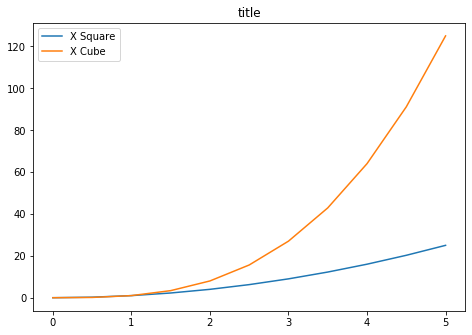

In [21]:
#Legends. To specify which figure is which
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.set_title("title");
ax.plot(x,x**2,label='X Square') #adding label with each plot to reference in plot with legend
ax.plot(x,x**3,label='X Cube')

ax.legend(loc=0)  #Added ax.legend at the bottom of the code to reference which plot is which
'''
loc=0 means choose the best location for legend so that it does not overlap the plot.
loc=1 -> top right, loc=2 -> top left,.......
'''
'''
if nothing seem to work for legend location you can manually set it also by specifying a tuple (x,y). 
for instance: ax.legend(loc=(0.1,0.1))
'''

### Plot Appearance

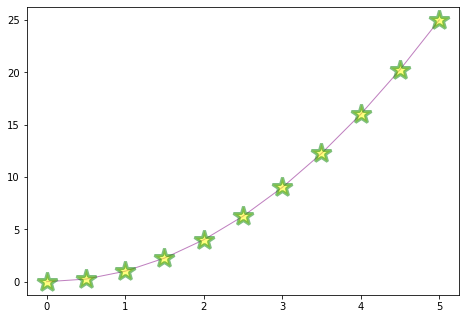

In [24]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
'''
# Setting linewidth=5 means, setting it to 5times to the default. 
linewidth=0.5 will set it to half times thickness to the default.
# Setting color name or rgb hex color code
# ax.plot(x,y,color='##FF8C00') #Setting plot color as RGB hex code
# Changing alpha refers to changing the line transparency
# For shorthand, you dont have to type linewidth=2, lw will work just fine. thus lw=2
# You can have your plot as multiple linestyles. 
for instance linestyle='--' will output dotted line. Also you can use '-.' or ':' or 'steps'. 
most popular '--' or just a solid line '-' 
# Shorthand for linestyle is ls. So you can write ls='--'
# markers: x is an array ([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]). 
Let's say we want to mark on the plot where those 11 points are. 
most common marker='o'. You can also use '+' or '*'
# To make the markers bigger, you pass argument markersize. markersize=1 is default.
# More arguments you can pass for ex: markerfacecolor, markersizewidth, markeredgecolor etc
'''
ax.plot(x,y,color='purple',lw=1,alpha=0.5,ls='-',marker='*',markersize=20,
       markerfacecolor='yellow',markeredgewidth=3,markeredgecolor='green') 


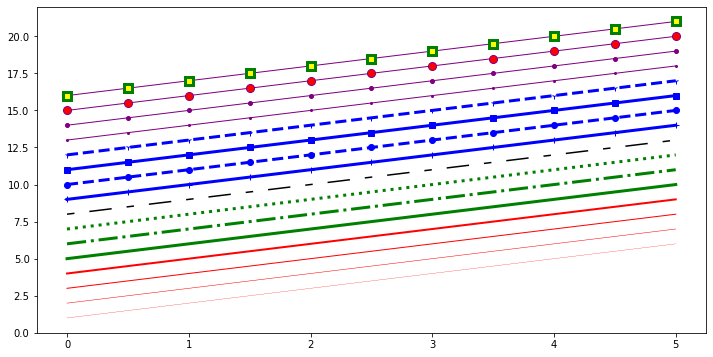

In [25]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

In [91]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

## Plot Range

(0, 2)

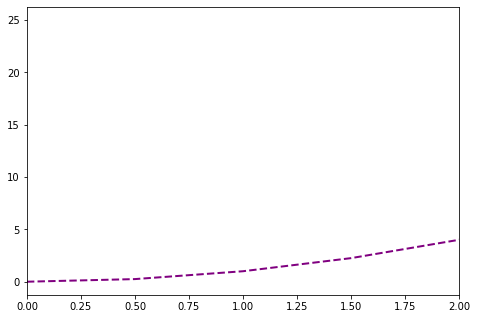

In [23]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax.plot(x,y,color='purple',lw=2,ls='--') 
#plot the curve only between x values of 0 to 1
ax.set_xlim([0,1])
#plot the curve only between y values of 0 to 2
ax.set_xlim([0,2])

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

In [103]:
'''
Special Plot Types: barplots, histograms, scatter plots
You can plot these using matplotlib
But seaborn is much better suited for these sort of statistical plotting. 
We will look into seaborn later on.
'''

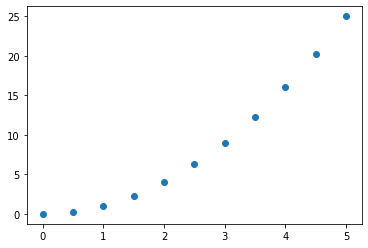

In [104]:
#Scatter Plot
plt.scatter(x,y)

(array([10.,  7.,  9., 13., 14.,  9., 10.,  5., 10., 13.]),
 array([ 11. , 107.6, 204.2, 300.8, 397.4, 494. , 590.6, 687.2, 783.8,
        880.4, 977. ]),
 <a list of 10 Patch objects>)

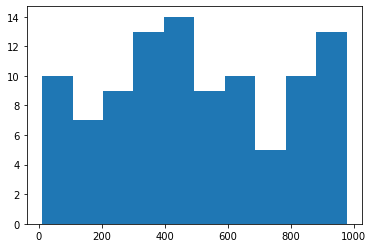

In [105]:
#Histogram
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

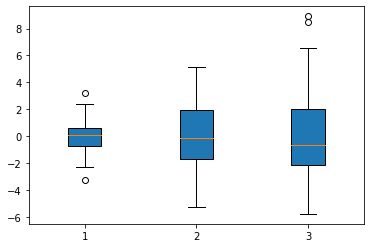

In [106]:
#Boxplot
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.


*** http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial. ***

 *** Notebook 04-Advanced Matplotlib Concepts.ipynb . Not covered because seaborn will be used more. You can study these if you want ***